In [24]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import glob

import slab_tracker_utils as slab
reload(slab)

import splits_and_merges as snm
reload(snm)

%matplotlib inline

#######################################################
# Define Input files for Muller 2016 AREPS model
#######################################################

'''
MODELDIR = '/Users/Simon/GIT/gplates-web/django/GWS/DATA/MODELS/MULLER2016/'
RotFile_List = ['%s/Global_EarthByte_230-0Ma_GK07_AREPS.rot' % MODELDIR]
GPML_List = ['%s/Global_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpmlz' % MODELDIR,\
             '%s/Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpmlz' % MODELDIR]
'''
'''
MODELDIR = '/Users/Simon/GIT/gplates-web/django/GWS/DATA/MODELS/SETON2012/'
RotFile_List = ['%s/Seton_etal_ESR2012_2012.1.rot' % MODELDIR]
GPML_List = ['%s/Seton_etal_ESR2012_PP_2012.1.gpmlz' % MODELDIR]
'''
'''
MODELDIR = '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/'
RotFile_List = ['%s/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot' % MODELDIR]
GPML_List = ['%s/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz' % MODELDIR,\
             '%s/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz' % MODELDIR,\
             '%s/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz' % MODELDIR]
'''

MODELDIR = '/Users/Simon/Desktop/Global_Model_WD_Internal_Release_2016_v3_RM17/'
RotFile_List = glob.glob('%s/*.rot' % MODELDIR)
GPML_List = glob.glob('%s/*.gpml' % MODELDIR)


# specify the convention for agegrids
# assumes that the file name has 1 number within it that specifies the age in Myr
# the list object below must contain 2 strings, which specify the bit before and after this number
#agegrid_filename = ['/Users/Simon/Data/AgeGrids/Agegrids_30m_20151002_2015_v1_r756/agegrid_30m_','.grd']

# If you do not have age grids, use the next line instead:
agegrid_filename = None

#####################################
rotation_model = pygplates.RotationModel(RotFile_List)
topology_features = pygplates.FeatureCollection()
for file in GPML_List:
    topology_feature = pygplates.FeatureCollection(file)
    topology_features.add(topology_feature)
#'''

pygplates.__version__


'2.0.0.12'

### Explanation
An example of how to define parameters.

Suppose you want to look at the material subducted between 20 Ma and 10 Ma, then you would specify the start_time as 20 and the end_time as 10. 

This will produce a plot which is a snapshot at 10 Ma (the end_time), with a series of lines that show subducted slabs traced from surface trench positions between 20 and 10 Ma (and with a spacing determined by 'time_step', and with a colour indicating the depth. 

Lines are drawn between sets of points which were subducted along the same trench at the same time - note that, ven though they look like contours, they are not actually contours in terms of having the same depth, or the same age of the subducting lithosphere, rather they are 'iso-subduction-time-chrons'

The depth and position of each point is a function of the slab dip.


[ the parameter 'warped_time_interval' is not actually used in this implementation ]



plates that persist between 21.00 Ma and 20.00 Ma are: 
 set([0, 645, 903, 904, 653, 911, 29201, 659, 406, 922, 901, 801, 802, 909, 301, 686, 818, 819, 607, 701, 608, 835, 709, 839, 201, 781, 50901, 602, 613, 224, 101, 401, 503])

plates that appeared between 21.00 Ma and 20.00 Ma are: 
 set([501, 50902, 511])

plates that disappeared between 21.00 Ma and 20.00 Ma are: 
 set([306, 708])

Working on appearing plates
Centroid for plate 501 mapped to plate 801 at delta time
Centroid for plate 50902 mapped to plate 503 at delta time
Centroid for plate 511 mapped to plate 801 at delta time

Working on disappearing plates
Centroid for plate 306 mapped to plate 301 at delta time
Centroid for plate 306 mapped to plate 701 at delta time
Centroid for plate 708 mapped to plate 301 at delta time
[306, 306, 708]
plates that persist between 20.00 Ma and 19.00 Ma are: 
 set([0, 645, 903, 904, 653, 911, 29201, 659, 406, 922, 901, 801, 802, 909, 301, 686, 818, 819, 701, 608, 835, 709, 839, 201, 781, 50

Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "TBD SUB" at 20.0Ma


plates that appeared between 1.00 Ma and 0.00 Ma are: 
 set([923, 925])

plates that disappeared between 1.00 Ma and 0.00 Ma are: 
 set([])

Working on appearing plates
Centroid for plate 923 mapped to plate 911 at delta time
Centroid for plate 925 mapped to plate 911 at delta time

Working on disappearing plates
[(306, 20.0), (306, 20.0), (708, 20.0), (835, 18.0), (839, 18.0), (613, 14.0), (613, 14.0), (922, 12.0), (971, 10.0), (9910, 9.0), (681, 6.0), (819, 5.0), (972, 5.0), (904, 3.0), (969, 3.0)]
time 20.00 Ma
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 20.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
301
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segmen


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma s


    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 1" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
659
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 2" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
608
Unable to find the overriding and subducting plates of the subducting s


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613


    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
686
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 20.0Ma


Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.0


    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 20.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South Sandwich trench" at 20.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South Sandwich trench" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
818
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 20.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 19.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 20.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 19.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 19.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
301
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction zone to close the Tethyan/Lhasa back-arc basin, southward jump after accretion" at 19.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma s


    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 1" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
659
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 2" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
608
Unable to find the overriding and subducting plates of the subducting s


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South Sandwich trench" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
818
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 19.0Ma
    there are not exactly 2 topologi


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 19.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613


    there are not exactly 2 topologies sharing the sub-segment.
686
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 19.0Ma


Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
time 18.00 Ma


    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 19.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "" at 19.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Trenched on NAP PAC 1" at 18.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.0


    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction zone to close the Tethyan/Lhasa back-arc basin, southward jump after accretion" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting s


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 18.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
686
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South Sandwich trench" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South Sandwich trench" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
818
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from a combination of RUM and COB file" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 18.0Ma
    there are not


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
659
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 2" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
608
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 18.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 18.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
301
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Palawan Trench" at 18.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma s


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 18.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 18.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean trench segment" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
29201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "TBD SUB" at 18.0Ma


Using 15.00 to 14.00 Ma stage pole for plate 613
time 17.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
29201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 18.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "TBD SUB" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Indonesian bndy w AUS-mg" at 17.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
686
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 17.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
301
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segmen


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction zone to close the Tethyan/Lhasa back-arc basin, southward jump after accretion" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 1" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
659
Unable to find the overriding and subduc


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.0


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 17.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 17.0Ma


Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.0


    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Middle America Trench" at 17.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Palawan Trench" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
602
Unable to find


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 16.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Tierra del Fuego Subduction Zone" at 17.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
904
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 16.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Indonesian bndy w AUS-mg" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
686
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 16.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
301
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction z


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
659
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 2" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
608
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Palawan Trench" at 16.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.0


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 16.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.0


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 16.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 15.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Palawan Trench" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
602
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 16.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 15.0Ma
    there are not exactly 2 topologies sharing the sub


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 15.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 15.00 to 14.00 Ma stage pole for plate 613


    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Palawan Trench" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 15.0Ma
    ther


Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613


    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 2" at 15.0Ma


Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 15.00 to 14.00 Ma stage pole for plate 613
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
608
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 15.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 15.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.0


    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
301
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction zone to close the Tethyan/Lhasa back-arc basin, southward jump after accretion" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South Sandwich trench" at 14.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
815
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "TBD SUB" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 14.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction zone to close the Tethyan/Lhasa back-arc basin, southward jump after accretion" at 14.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 14.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of G


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
time 13.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "TBD SUB" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 13.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 13.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction zone to close the Tethyan/Lhasa back-arc basin, southward jump after accretion" at 13.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 13.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South Sandwich trench" at 13.0Ma


Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 13.00 to 12.00 Ma stage pole for plate 922
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
815
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:South Sandwich trench" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 13.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 12.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 12.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 12.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
301
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subducti


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
802
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Sandwich Trench" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 12.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 11.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 11.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean trench segment" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the subducting plate of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 11.0Ma
    both sharing topologies are on overriding side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 11.0Ma
    


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 11.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 10.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from a combination of RUM and COB file" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from a combination of RUM and COB file duplicate for closure" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
904
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from a combination of RUM and COB file duplicate for closure" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-s


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kalimantan subduction boundary (inferred)" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
645
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 10.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 10.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 10.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 9.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from a combination of RUM and COB file" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from a combination of RUM and COB file duplicate for closure" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
904
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subd


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kalimantan subduction boundary (inferred)" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
645
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 9.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 9.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-seg


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 9.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 8.00 Ma
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding plate of the subducting shared sub-segment "North Andes Trench Segment" at 9.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 8.0Ma
    there are not exactly 2 topologies sharing 


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Halmahera Subduction" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
678
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kalimantan subduction boundary (inferred)" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
645
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 8.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte C


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 7.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Trenched on NAP PAC 1" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 7.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding plate of the subducting shared sub-segment "North Andes Trench Segment" at 7.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Sulawesi Subduction" at 7.0Ma
    there are not exactly 2


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction zone to close the Tethyan/Lhasa back-arc basin, southward jump after accretion" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
607
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding plate of the subducting shared sub-segment


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 6.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding plate of the subducting shared sub-segment "North Andes Trench Segment" at 6.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:Java SZ" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 6.0Ma
    there are not exactly 2 topologies sharing the


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 6.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding plate of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 6.0Ma
    both sharing topologies are on subducting side of subducting line.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Halmahera Subduction" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
678
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kalimantan subduction boundary (inferre


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 5.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean trench segment" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean trench segment" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 6.0Ma
    there are not exactly 2 topologies 


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
970
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Indonesian bndy w AUS-mg" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kalimantan subduction boundary (inferred)" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
645
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from 


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Flores Banda SZ" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "New Hebrides Trench small segment" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "PNG subduction" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
697
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:COCOS - NORTH AMERICA TRENCH 1" at 5.0Ma
    there are not exactly 2 t


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 4.00 Ma


Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 4.0Ma


Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
970
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Indonesian bndy w AUS-mg" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
511
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kalimantan subduction boundary (inferred)" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
645
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
101
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from 


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904


    there are not exactly 2 topologies sharing the sub-segment.
697
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Subduction of Greater India" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
50901
Unable to find the overriding and subducting plates of the subducting shared sub-segment "New Hebrides Trench small segment" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Java SZ" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Flores Banda SZ" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Shirshov Ridge Subduction" at 4.0Ma
    there are not exactly 2 topologies sharing 


Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
Using 4.00 to 3.00 Ma stage pole for plate 904
time 3.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "CLONE:COCOS - NORTH AMERICA TRENCH 1" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 3.0Ma
    there are not 


time 2.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Northern most NAN PAC f NUMVEL file MG 4-28-07" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Northern most NAN PAC f NUMVEL file MG 4-28-07" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "New Hebrides Trench" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
824
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NewHebrides VanuatuTrench DiCaprio" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
801
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Marianas Trench-NUVEL" at 


time 1.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
406
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
970
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Izu Bonin Trench" at 1.0Ma
    there are not


time 0.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
909
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Andean Trench Segment" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "North Andes Trench Segment" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
201
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 0.0Ma
    there are 


    there are not exactly 2 topologies sharing the sub-segment.
0
Unable to find the overriding and subducting plates of the subducting shared sub-segment "So California, Baja SZ" at 0.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
104
Unable to find the overriding and subducting plates of the subducting shared sub-segment "COCOS - NORTH AMERICA TRENCH 1" at 0.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
909


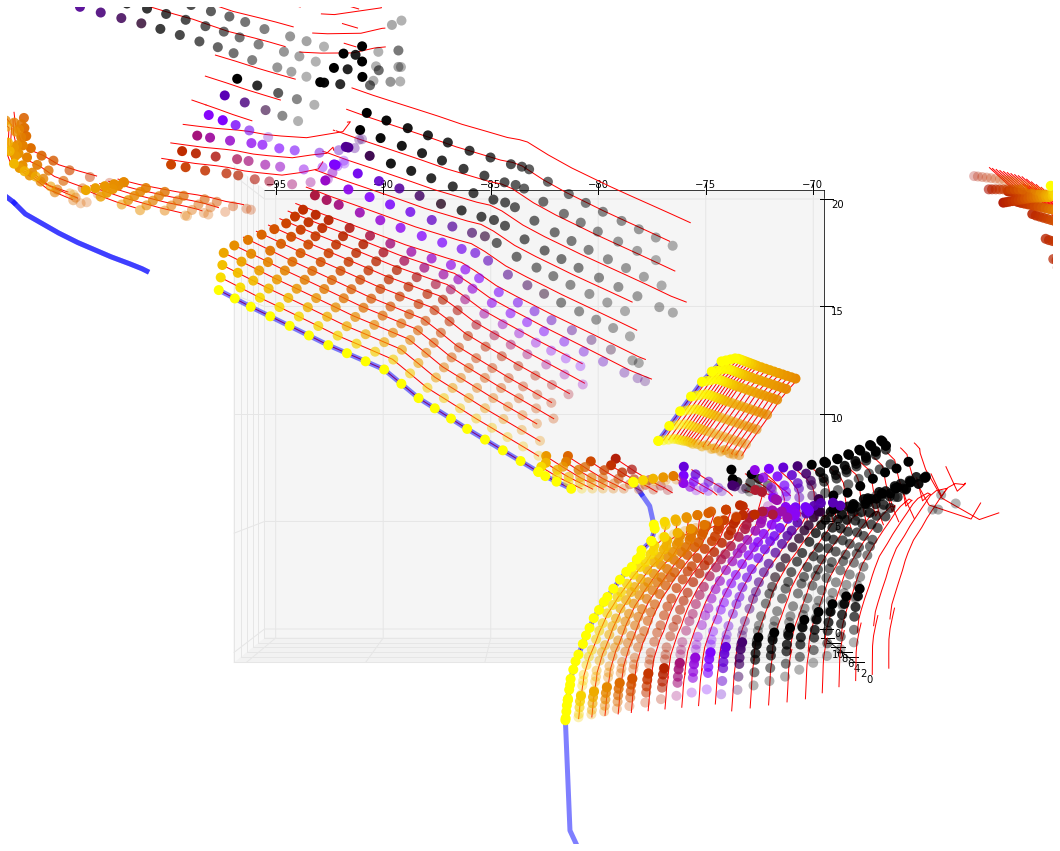

In [28]:
#############################
# INPUT PARAMETERS
# 
start_time = 20.
end_time = 0.
time_step = 1.0
dip_angle_degrees = 45.0
line_tessellation_distance = np.radians(1.0)
handle_splits = True
# Try to use small circle path for stage rotation to rotate along velocity dip.
# Ie, distance to stage rotation pole matches distance to original stage pole.
#use_small_circle_path = False

output_filename = 'subduction_3d_geometries_time_%0.2fMa_dip_%0.2fdeg.asc' % (end_time,dip_angle_degrees)


#############################

# create empty list to put all the features in
#point_features = []

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111, projection='3d')


# array into which results will be stored
output_data = []

dip_angle_radians = np.radians(dip_angle_degrees)

time_list = np.arange(start_time,end_time-time_step,-time_step)

if handle_splits:
    plate_disappearance_time_lut = snm.get_plate_disappearance_time_lut(topology_features,
                                                                        rotation_model,
                                                                        time_list,
                                                                        verbose=True)

print plate_disappearance_time_lut

# loop over a series of times at which we want to extract trench iso-sub-chrons
for time in time_list:
    
    print 'time %0.2f Ma' % time
    
    # call function to get subduction boundary segments
    subduction_boundary_sections = slab.getSubductionBoundarySections(topology_features,
                                                                      rotation_model,
                                                                      time)
    
    # Set up an age grid interpolator for this time, to be used
    # for each tessellated line segment
    if agegrid_filename is not None:
        grdfile = '%s%d%s' % (agegrid_filename[0],time,agegrid_filename[1])
        lut = make_age_interpolator(grdfile)
    
    # Loop over each segment
    for segment_index,subduction_segment in enumerate(subduction_boundary_sections):
    
        # find the overrding plate id (and only continue if we find it)
        overriding_and_subducting_plates = slab.find_overriding_and_subducting_plates(subduction_segment,time)
        
        #subduction_dip = subduction_segment.get_feature().get_double(pygplates.PropertyName.create_gpml('subductionZoneDeepDip'))
        
        if not overriding_and_subducting_plates:
            continue
        overriding_plate, subducting_plate, subduction_polarity = overriding_and_subducting_plates

        overriding_plate_id = overriding_plate.get_resolved_feature().get_reconstruction_plate_id()
        subducting_plate_id = subducting_plate.get_resolved_feature().get_reconstruction_plate_id()
        
        #if (opid!=224 or cpid!=909):
        #if (subducting_plate_id!=911 and subducting_plate_id!=909):
        #if subducting_plate_id<900:
        #    continue
        
        subducting_plate_disappearance_time = -1.
        if handle_splits:
            for plate_disappearance in plate_disappearance_time_lut:
                if plate_disappearance[0]==subducting_plate_id:
                    subducting_plate_disappearance_time = plate_disappearance[1]
        
        tessellated_line = subduction_segment.get_resolved_geometry().to_tessellated(line_tessellation_distance)

        #print len(tessellated_line.get_points())
        
        if agegrid_filename is not None:
            x = tessellated_line.to_lat_lon_array()[:,1]
            y = tessellated_line.to_lat_lon_array()[:,0]
            subduction_ages = lut.ev(np.radians(y+90.),np.radians(x+180.))
        else:
            # if no age grids, just fill the ages with zero
            subduction_ages = [0. for point in tessellated_line.to_lat_lon_array()[:,1]]
              
        # CALL THE MAIN WARPING FUNCTION
        (points, 
         point_depths, 
         polyline) = slab.warp_subduction_segment(tessellated_line,
                                                  rotation_model,
                                                  subducting_plate_id,
                                                  overriding_plate_id,
                                                  subduction_polarity,
                                                  time,
                                                  end_time,
                                                  time_step,
                                                  dip_angle_radians,
                                                  subducting_plate_disappearance_time)
        
 
        # add points for this segment to the plot
        ax.scatter(polyline.to_lat_lon_array()[:,1],
                   polyline.to_lat_lon_array()[:,0],
                   np.array(point_depths)/100,
                   c=np.array(point_depths),s=100,
                   edgecolors='',vmin=0,vmax=660,zorder=2,cmap=plt.cm.gnuplot_r)
        ax.plot(polyline.to_lat_lon_array()[:,1],polyline.to_lat_lon_array()[:,0],
                 '-r',markersize=12,zorder=1)
        
        output_data.append([time,polyline,point_depths,subduction_ages])


# write out the features
#output_features = pygplates.FeatureCollection(point_features)

#output_features.write('SlabWindowPoints.gpmlz')
for szg in subduction_boundary_sections:
        tmpp = szg.get_resolved_geometry().to_lat_lon_array()
        ax.plot(tmpp[:,1],tmpp[:,0],'b',linewidth=5,alpha=0.5)

#ax.colorbar()

# Central America
#ax.set_xlim(-110,-60)
#ax.set_ylim(-10,35)
#plt.xlim(-95,-78)
#plt.ylim(6,20)
plt.xlim(-95,-70)
plt.ylim(0,20)

# Patagonia
#plt.xlim(-90,-30)
#plt.ylim(-65,-30)
#plt.xlim(-40,-30)
#plt.ylim(-62,-50)

# Peru
#plt.xlim(-90,-30)
#plt.ylim(-25,10)

# Japan
#plt.xlim(115,150)
#plt.ylim(15,60)

ax.set_zlim(10,0)
ax.set_aspect('equal')

ax.view_init(90, -90)

#fig.show()


### write results to file
slab.write_subducted_slabs_to_xyz(output_filename,output_data)



### 